#  EDA and visualization

In the last lecture we focussed on the machinery needed to get data into a tabular form. In this lecture we focus on the visualization part of Exploratory Data Analysis. This notebook accompanies the slides. It is strongly recommended that you see the lecture/read the slides and then work on this notebook. The textual descriptions are sparse here and the code will become much clearer in the context of visualization best practices.

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

The seaborn API is changing, and `seaborn.apionly` is being deprecated. The default will soon behave like `apionly` and not change the standard matplotlib color scheme and defaults. Here we choose `apionly` to make sure we have to do everything explicitly.

In [2]:
# versions below 0.8.1
import seaborn.apionly as sns #sets up styles and gives us more plotting options

/Users/natsheh_ar/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/natsheh_ar/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/natsheh_ar/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/natsheh_ar/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/natsheh_ar/opt/anaconda3/lib/python3.7/_collectio

## Getting the mtcars dataset into shape

 

The documentation for this data is [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) but I have extracted some relevant parts below:

```
Description

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

Usage

mtcars
Format

A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	V/S
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors
Source

Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
```

In [3]:
dfcars=pd.read_csv("data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


There is an ugly  poorly named column right here. Lets fix that.

In [4]:
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
dfcars.shape

(32, 12)

We parse out a `maker`, which we shall lkater use to group cars.

In [6]:
dfcars['maker'] = dfcars.name.apply(lambda x: x.split()[0])
dfcars['maker']

0        Mazda
1        Mazda
2       Datsun
3       Hornet
4       Hornet
5      Valiant
6       Duster
7         Merc
8         Merc
9         Merc
10        Merc
11        Merc
12        Merc
13        Merc
14    Cadillac
15     Lincoln
16    Chrysler
17        Fiat
18       Honda
19      Toyota
20      Toyota
21       Dodge
22         AMC
23      Camaro
24     Pontiac
25        Fiat
26     Porsche
27       Lotus
28        Ford
29     Ferrari
30    Maserati
31       Volvo
Name: maker, dtype: object

This is what the dataframe looks like now:

In [7]:
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,maker
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


We can construct the `av_mpg` series by using the "split-apply-combine" paradigm and summarizing within group data by a mean:

In [8]:
av_mpg = dfcars.groupby('maker').mpg.mean()
av_mpg

maker
AMC         15.200000
Cadillac    10.400000
Camaro      13.300000
Chrysler    14.700000
Datsun      22.800000
Dodge       15.500000
Duster      14.300000
Ferrari     19.700000
Fiat        29.850000
Ford        15.800000
Honda       30.400000
Hornet      20.050000
Lincoln     10.400000
Lotus       30.400000
Maserati    15.000000
Mazda       21.000000
Merc        19.014286
Pontiac     19.200000
Porsche     26.000000
Toyota      27.700000
Valiant     18.100000
Volvo       21.400000
Name: mpg, dtype: float64

## Simple EDA

(as provided by  Chris, a previous head-TF for cs109)

He says:

I'd like to suggest a basic rubric for the early stages of exploratory data analysis in Python. This isn't universally applicable, but it does cover many patterns which recur in several data analysis contexts. It's useful to keep this rubric in mind when encountering a new dataset.

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

So far we have **built** the dataframe, and carried out very minimal cleaning (renaming) in this dataframe. 

### Exploring global properties

So lets focus on visualizing global properties of the data set below. For now, we shall only focus on `mpg` to illustrate the concepts, but you want to be doing this for all the columns. It may identify interesting properties and even errors in the data.

While we do this we shall see several examples of the  `matplotlib` plotting experience.

We first use seaborn to set the **global** matplotlib plotting context. Here we set it to `notebook` which makes for reasonable sized graphics.

In [9]:
sns.set_context("notebook")

We ask what the defaukt color palette is. Since we imported `sns.apionly`, we get the default matplotlib color palette.

In [10]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Now we see maplotlib's default color palette, 'viridis'.

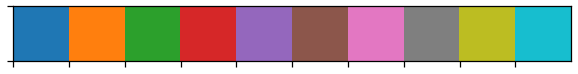

In [11]:
sns.palplot(sns.color_palette());

We can choose other palettes. The default palette is for qualitative data. It creates a color cycle we use in our plots. In other words, as we plot multiple things in a plot, it will use these colors one-by-one.

In [12]:
output = sns.choose_colorbrewer_palette(data_type="qualitative")

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

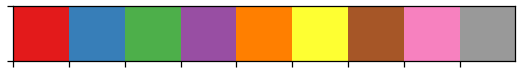

In [13]:
sns.palplot(output)

In [14]:
sns.set_palette(output)

#### Bar Charts

We see that Pandas series very niftily give us bar graphs.

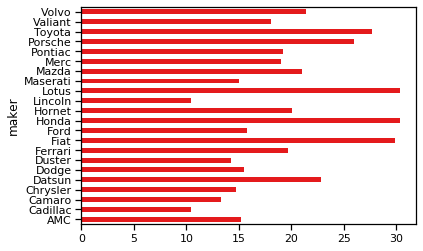

In [15]:
av_mpg.plot(kind="barh")

In [16]:
sns.reset_defaults()

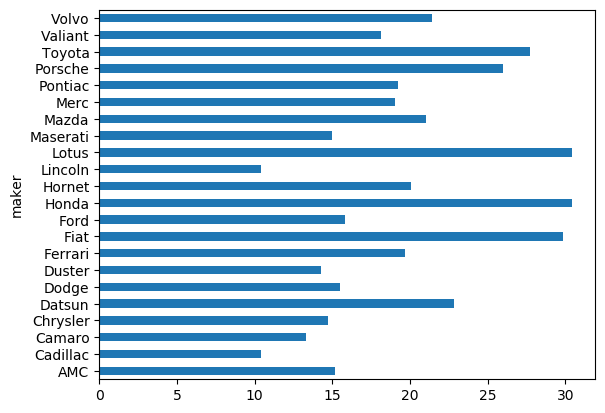

In [17]:
av_mpg.plot(kind="barh")

The default, which comes from matplotlib, is chart-junky (although not as much as matlab, or as much as it used to be in earlier versions of matplotlib). But lets clean it.

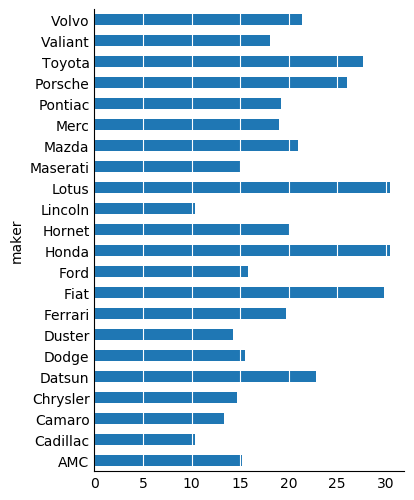

In [18]:
plt.figure(figsize=(4, 6))
ax = plt.gca()
av_mpg.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine()

And more....

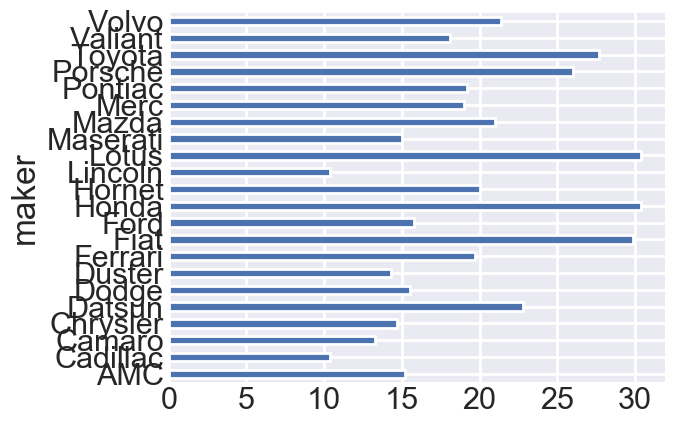

In [61]:
with sns.plotting_context("poster"):
    ax = plt.gca()
    av_mpg.plot(kind="barh")
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    sns.despine(left=True, bottom=True)

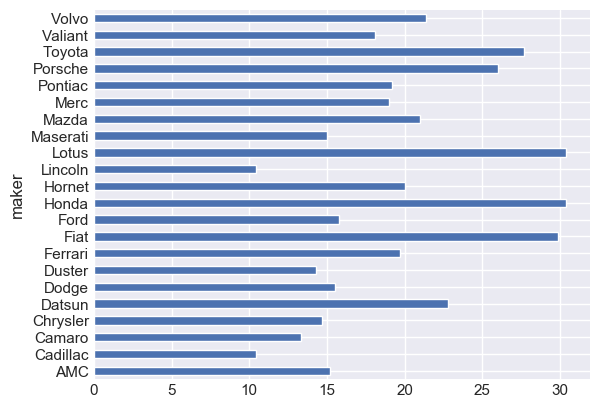

In [62]:
with sns.plotting_context("notebook"):
    ax = plt.gca()
    av_mpg.plot(kind="barh")
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    sns.despine(left=True, bottom=True)

Its important to understand what is going on under the hood. Try and write `sns.despine` on your own by looking up the matplotlib documentation.

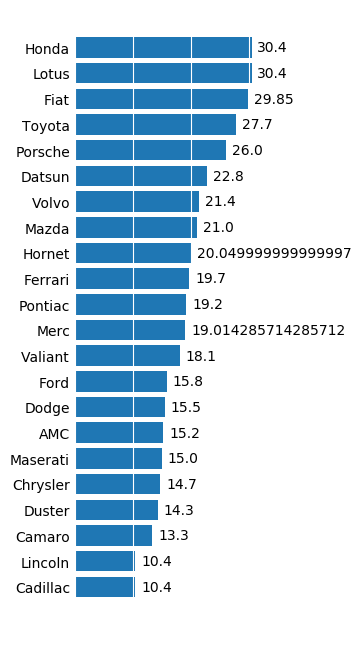

In [20]:
plt.figure(figsize=(3, 8))
ax = plt.gca()
av_mpg2 = av_mpg.sort_values()
makes = av_mpg2.index
speeds = av_mpg2.values
nums = np.arange(len(av_mpg2))
plt.barh(nums, speeds)
for p, c, ch in zip(nums, makes, speeds):
    plt.annotate(str(ch), xy=(ch + 1, p), va='center')
ticks = plt.yticks(nums, makes)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

#### Histograms

Numerical data leads to distributions, and distributions to histograms. Here is the Pandas default

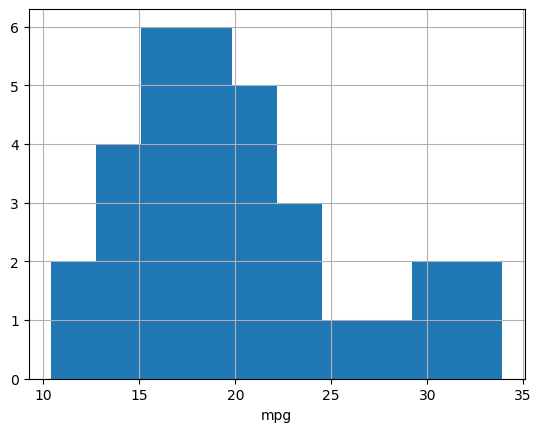

In [21]:
dfcars.mpg.hist()
plt.xlabel("mpg");

And matplotlib:

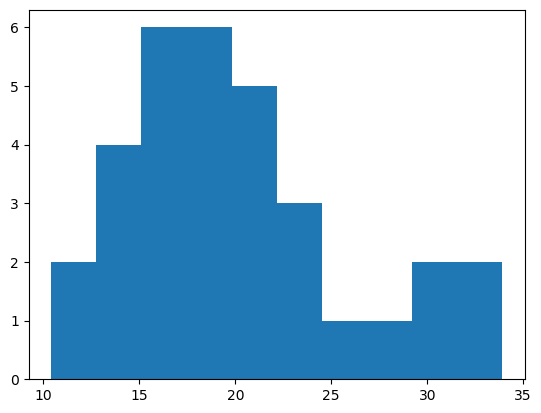

In [22]:
plt.hist(dfcars.mpg.values);

Lets style it a bit with seaborn. The `with` syntax followed by indentation is a python construct called a "context manager". Here it sets up a while axes style only for the code that is *inside* the context (ie, indented).

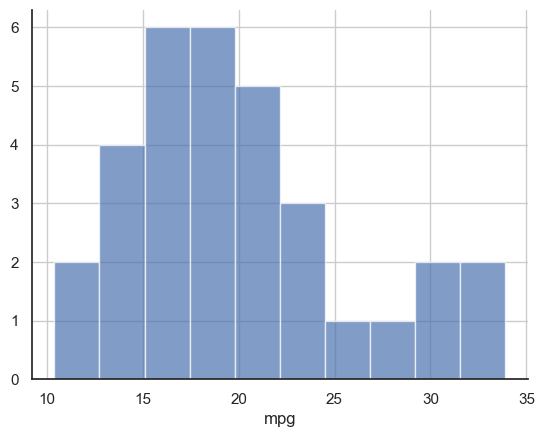

In [63]:
with sns.axes_style("white"):
    dfcars.mpg.hist(alpha=0.7)
    plt.xlabel("mpg");
    sns.despine()


What if I wanted to get the benefit of the default seaborn style and colors?

In [24]:
sns.set()

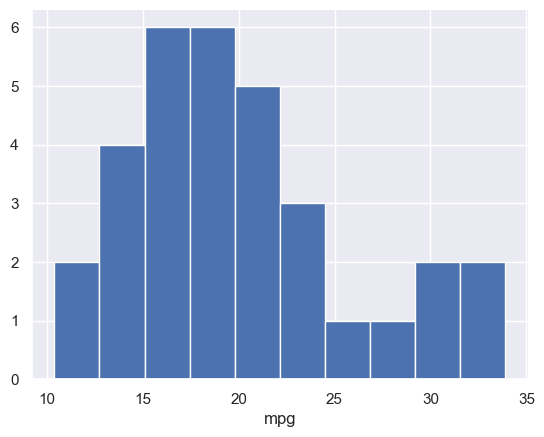

In [25]:
dfcars.mpg.hist()
plt.xlabel("mpg");
sns.despine()

I can `reset_defaults` back to the matplotlib defaults.

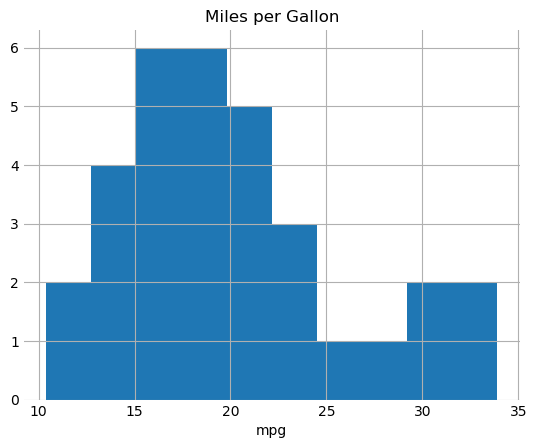

In [26]:
sns.reset_defaults()
ax = plt.gca()
dfcars.mpg.hist()
plt.xlabel("mpg");
plt.title("Miles per Gallon")
ax.tick_params(axis='both', which='both',length=0)
sns.despine(bottom=True, left=True)

Here are the most commonly used matplotlib plotting routines.

![](images/mpl1.png)

Here we use a white grid.  We also illustrate how a series can be converted to a numpy array with the `values` method (`dfcars.mpg.values`) and how x and y limits can be set (the difference in the way `xlim` and `ylim` are called is on purpose and illustrates two ways you can set the limits). In the `hist` function  you can also change the number of bins. We also show how to label a plot and obtain a legend from the plot. A vertical line is drawn at the mean.

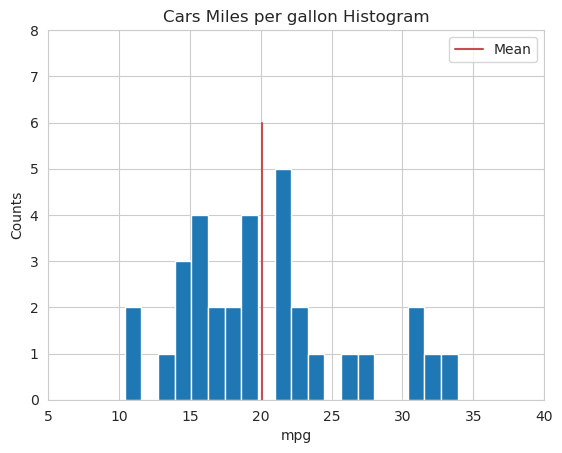

In [27]:
with sns.axes_style("whitegrid"):
    plt.hist(dfcars.mpg.values, bins=20)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), 0, 0.75, color='r', label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

One can set bins using a list, and also label the histogram (not recommended but just for illustration). We also illustrate how to capture the color used and use it again

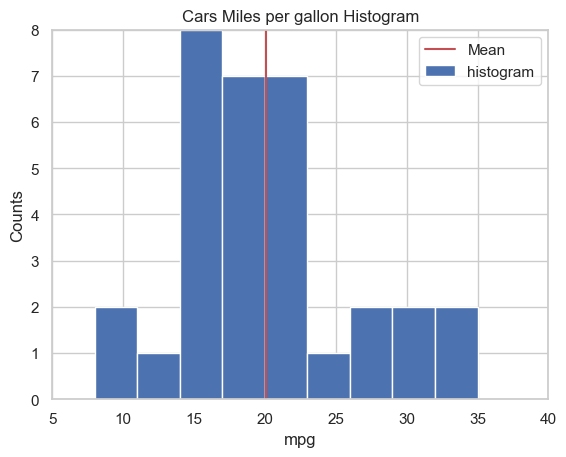

In [77]:
with sns.axes_style("whitegrid"):
    color = sns.color_palette()[0]
    plt.hist(dfcars.mpg.values, bins=range(5, 40, 3), label="histogram", color=color)
    plt.xlim(5, 40)
    plt.ylim([0, 8])
    plt.axvline(dfcars.mpg.mean(), color='r', label='Mean')
    plt.xlabel("mpg")
    plt.ylabel("Counts")
    plt.title("Cars Miles per gallon Histogram")
    plt.legend()

Seaborn very handily provides Kernel Density Estimates (KDE) which try to infer a probability distribution from the data. This is more useful when you have lots of data.

In [29]:
sns.set()

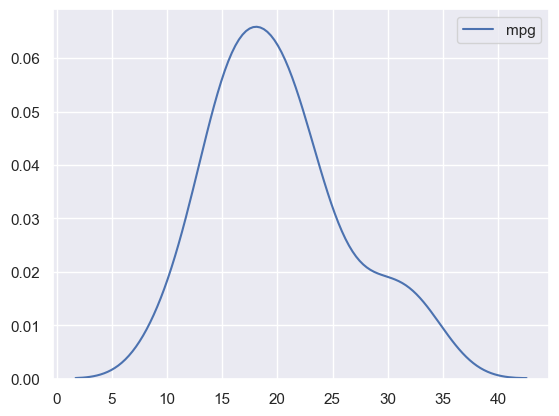

In [30]:
sns.kdeplot(dfcars.mpg);

And a histogram and a kdeplot together:

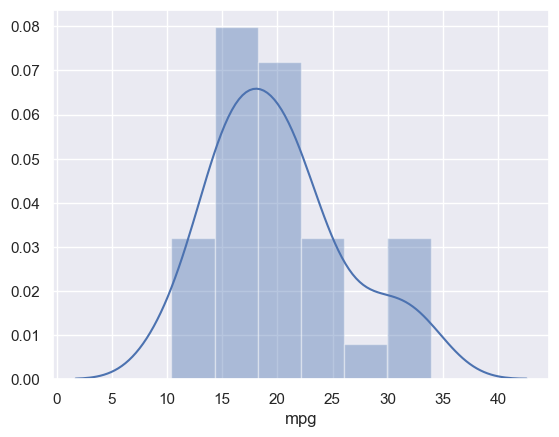

In [70]:
sns.distplot(dfcars.mpg);

### Plotting features against other features

Sometimes we want to see co-variation amongst our columns. A scatter-plot does this for us.

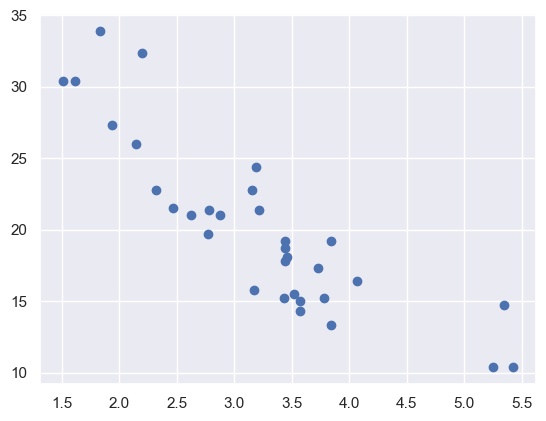

In [32]:
plt.scatter(dfcars.wt, dfcars.mpg);

We can also use `plot` without lines:

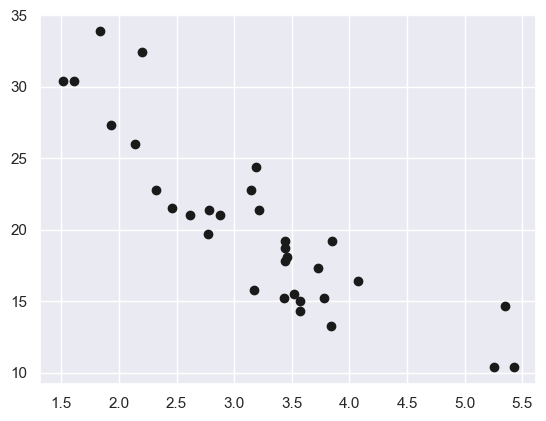

In [33]:
plt.plot(dfcars.wt, dfcars.mpg, marker='o', linestyle='None', color='k');

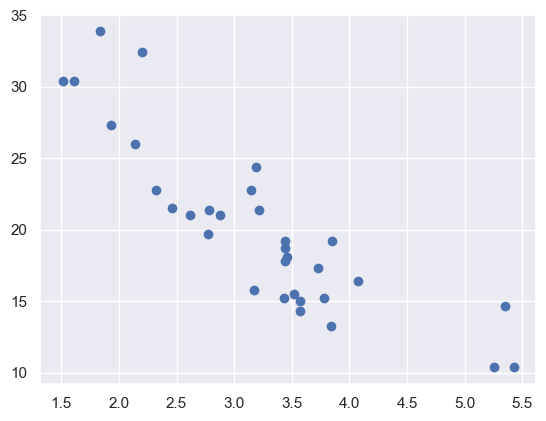

In [34]:
plt.plot(dfcars.wt, dfcars.mpg, 'o')
plt.show()

But what if we want to save our figure into a file? The extension tells you how it will be saved..and note that the `savefig` needs to be in the same cell as the plotting commands. Go look at the files..

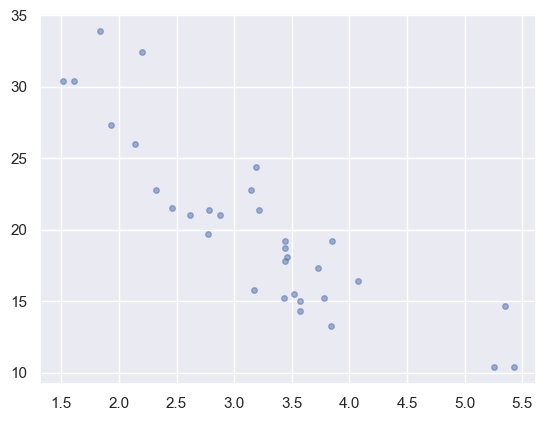

In [78]:
plt.plot(dfcars.wt, dfcars.mpg, 'o', markersize=4, alpha=0.5)
plt.savefig('foo1.pdf')
plt.savefig('foo2.png', bbox_inches='tight') #less whitespace around image

#### Trend

The correlation that we saw might suggest a trend. We can capture it with a "regression". We'll learn more about regressions soon, but we show a quadratic fit here with a 1 standard deviation bar to show the graphics aspect of this. Also see `sns.regplot`.

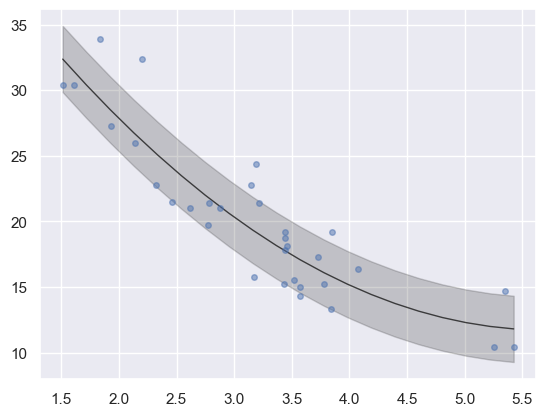

In [36]:
x = dfcars.wt
y = dfcars.mpg
params = np.polyfit(x, y, 2)
xp = np.linspace(x.min(), x.max(), 20)
yp = np.polyval(params, xp)
plt.plot(xp, yp, 'k', alpha=0.8, linewidth=1)
plt.plot(dfcars.wt, dfcars.mpg, 'o', markersize=4, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, 
                 color='k', alpha=0.2)

## Group Properties

Such "co-variational" plots, and for that matter, even single-variable plots,  are even more interesting when we look at them **conditional** upon the value of a categorical variable.

Such conditionality is behind the notion of grouping, where we group our data by various values of categorical variables, for example, whether our cars have an automatic transmission or not.

### Grouping of one outcome variable

This notion of grouping based on combinations of factors is used by seaborn to make various easy-to-see exploratory visualizations for us. We shall first see how to make these plots quick-and-dirty using `seaborn` and then see how we make make these plots ourselves.

First, we make a boxplot of  `mpg`, grouped by transmission style

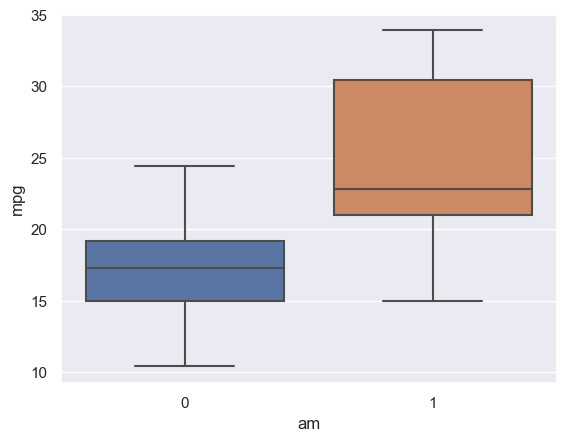

In [37]:
sns.boxplot(x='am', y='mpg', data=dfcars);

The box shows the quartiles  of the distribution
This can also be done using a violin-plot, which uses KDE to show the distribution itself:

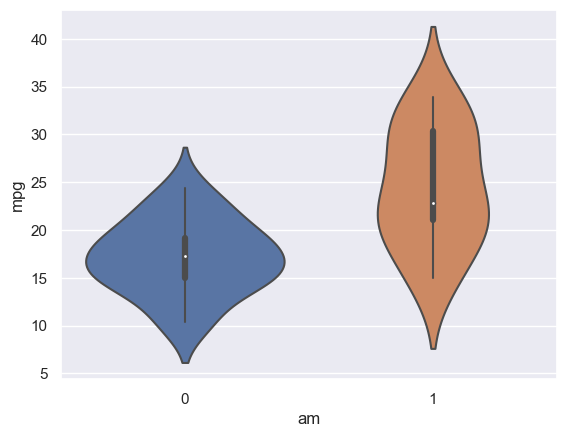

In [38]:
sns.violinplot(x='am', y='mpg', data=dfcars);

Automatics surveyed have a higher range of  mpg, with higher fuel efficiency significant at 1 sigma, and we may want to investigate if this is a selection effect or whether there is some true impact of an automatic transmission. Further subgrouping the data is one way to do this.

Split violin plots can be used to do multiple categorical variables

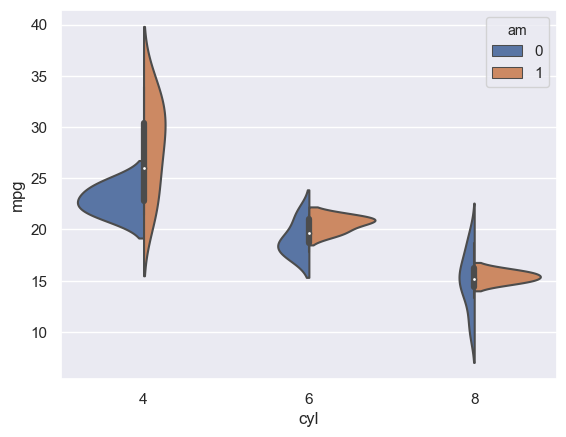

In [39]:
sns.violinplot(x='cyl', y='mpg', hue='am', order=[4, 6, 8], data=dfcars, split=True);

One can see that the difference in mpg is starker between 6 and 8 cylinder cars, for manual transmissions. And that the large-range effect in automatics is coming almost entirely through 4-cylinder cars.  What about the better mpg for automatics? Mostly in the 4 and 6 cyclinders. But we ought to see how representative these are in our sample. We'll show how to do this soon but a cross-tabulation, combined with the graph above, gives us some idea that the poor miles per gallon for manual transmission may be coming from the preponderance of 8-cylinder manual cars in our dataset.

In [40]:
pd.crosstab(dfcars.am, dfcars.cyl)

cyl,4,6,8
am,,,
0,3,4,12
1,8,3,2


### Faceting for general grouping

Seaborn provides a nice construct: the `FacetGrid`. You decide what variables to facet over, and then decide the kind of plot you want. Here we want hue to be `am`, and  different columns in the  plot grid to be cylinders. We then ask for a facet plot  of `mpg` against `wt` scatter.

Such plots are often called small multiple plots. They repeat the same plot based on categories, making sure that all plotting parameters are the same so that we have direct comparability.

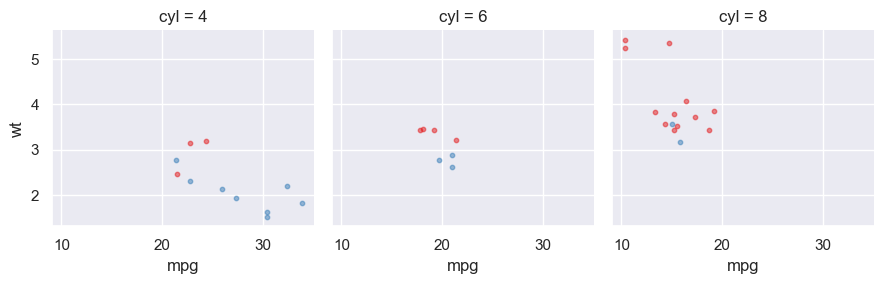

In [41]:
g = sns.FacetGrid(dfcars, col="cyl", hue="am", palette="Set1")
g.map(plt.scatter, "mpg", "wt", alpha=0.5, s=10);

We can see that the "regression-like" effect is cleanest for automatic transmissions in 4 cylinder cars.

#### SPLOM, or Scatter Plot Matrix

We'd get tired if we had to this on a 2-by-2 basis for every pair of continuously co-varying features.  The `PairGrid`, colorable by transmission type, allows us to do this comparison for 5 continuous features here, with the diagonal being a kernel density estimate.

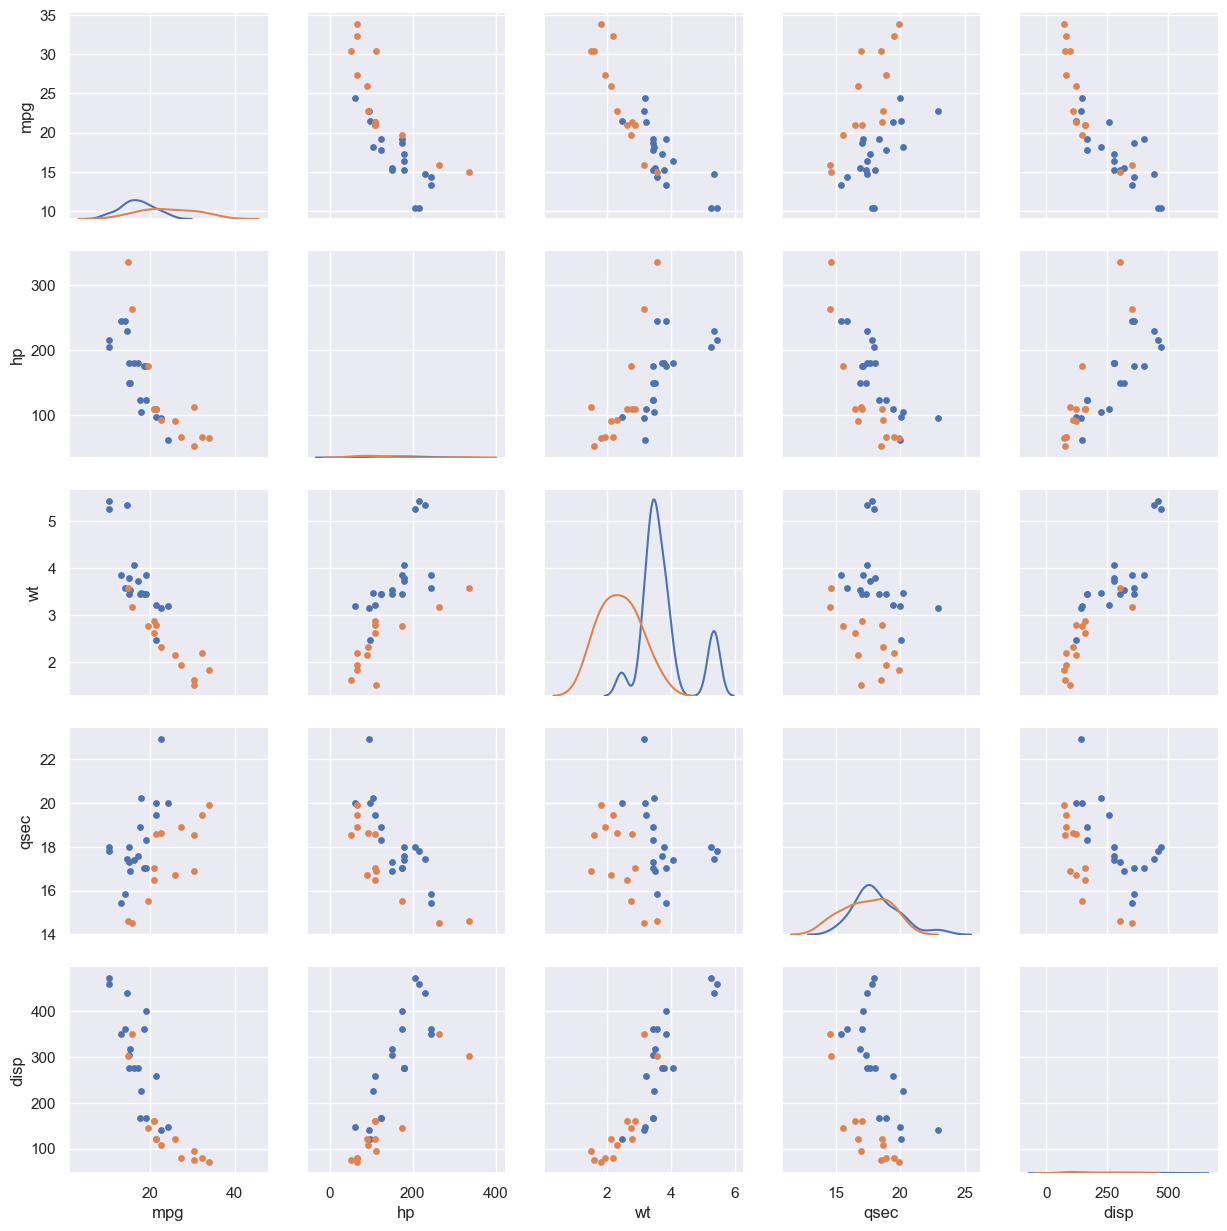

In [42]:
g = sns.PairGrid(dfcars, vars=['mpg', 'hp', 'wt', 'qsec', 'disp'], hue="am")
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15)

In many places, for example `mpg` vs `disp`, there see to be two separate trends for the different transmissions. This will (as we shall see later in this course) suggest to us the addition of a transmission term as a **indicator** variable in regressions for `mpg` against various features. This changes the intercept of the regression. But the trends have different slopes as well, which suggests that `disp` may interact with `am`, the transmission indicator to create a varying slope as well.

#### Correlation

The SPLOM seems to suggest correlations. Well, so lets calculate it:

In [43]:
dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr()

,mpg,wt,hp,qsec,disp
mpg,1.000000,-0.867659,-0.776168,0.418684,-0.847551
wt,-0.867659,1.000000,0.658748,-0.174716,0.887980
hp,-0.776168,0.658748,1.000000,-0.708223,0.790949
qsec,0.418684,-0.174716,-0.708223,1.000000,-0.433698
disp,-0.847551,0.887980,0.790949,-0.433698,1.000000


Since correlations range from -1 to 1 through 0, a diverging palette is probably our best bet.

In [44]:
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

We use `maptplotlib`s correlation plot. You'll land up doing plots like this for both EDA and do see misclassification from your machine learning algorithms. In other words, EDA is even useful at the analysis stage.

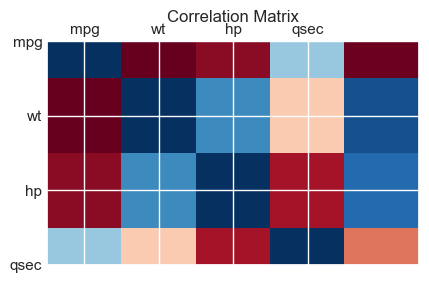

In [45]:
plt.matshow(dfcars[['mpg', 'wt', 'hp', 'qsec', 'disp']].corr(), cmap=dpal)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0);
plt.title("Correlation Matrix")
plt.xticks(range(4), ['mpg', 'wt', 'hp', 'qsec', 'disp'])
plt.yticks(range(4), ['mpg', 'wt', 'hp', 'qsec', 'disp']);


### KDE plots and sequential palettes.

Here we make a KDE plot of a multivariate normal distribution. Since a probability density is strictly positive, with values near 0 not being so interesting, a sequential palette is our ticket. Seaborn will by default provide such a palette for KDE plots, but you can use your own!

In [46]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 1000)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,-1.119444,-0.255389
1,-0.051862,0.526429
2,-1.112181,0.654101
3,1.189308,1.925549
4,1.318203,1.166335


In [47]:
seqpal = sns.choose_colorbrewer_palette("sequential", as_cmap=True)

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

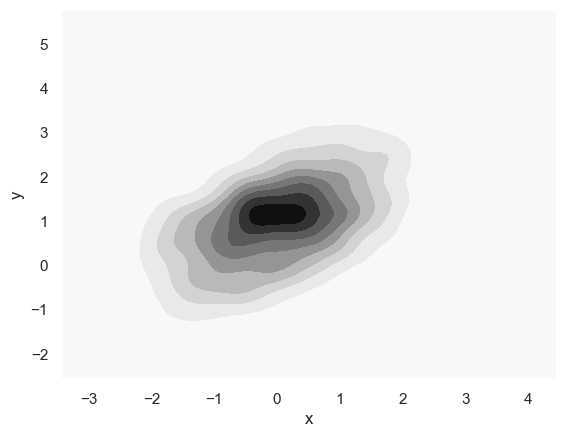

In [48]:
sns.kdeplot(df.x, df.y, cmap=seqpal, shade=True);

## Matplotlib and multiple plots: Small Multiples

There are many cases where we want to see plots side by side. The SPLOMS and Facet grids that seaborn makes for us are an example.But we should know how to do this on our own.

![](images/mpl2.png)

Here is a simple example of a plot with one column and 3 rows. It illustrates one way of doing this.

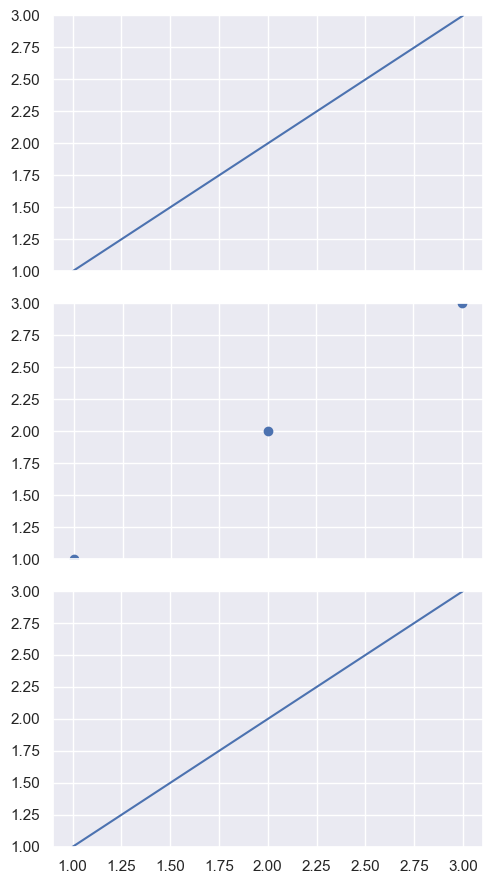

In [49]:
fig = plt.figure(figsize=(5, 9))

ax1 = fig.add_subplot(311)
ax1.plot([1, 2, 3], [1, 2, 3])
ax1.set_xticklabels([])
ax1.set_ylim([1.0, 3.0])

ax2 = fig.add_subplot(312)
ax2.scatter([1, 2, 3], [1, 2, 3])
ax2.set_xticklabels([])
ax2.set_ylim([1.0, 3.0])

ax3 = fig.add_subplot(313)
ax3.plot([1, 2, 3], [1, 2, 3])
ax3.set_ylim([1.0, 3.0])


fig.tight_layout()

### Small multiples, youself

Here is another way, which to me is far clearer that the `add_subplot` way. It basically creates an array of plots and zips this array up with the various data grouped by categories.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19081c50>
(7, 13)
(10, 13)
(3, 13)
(12, 13)


/Users/natsheh_ar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


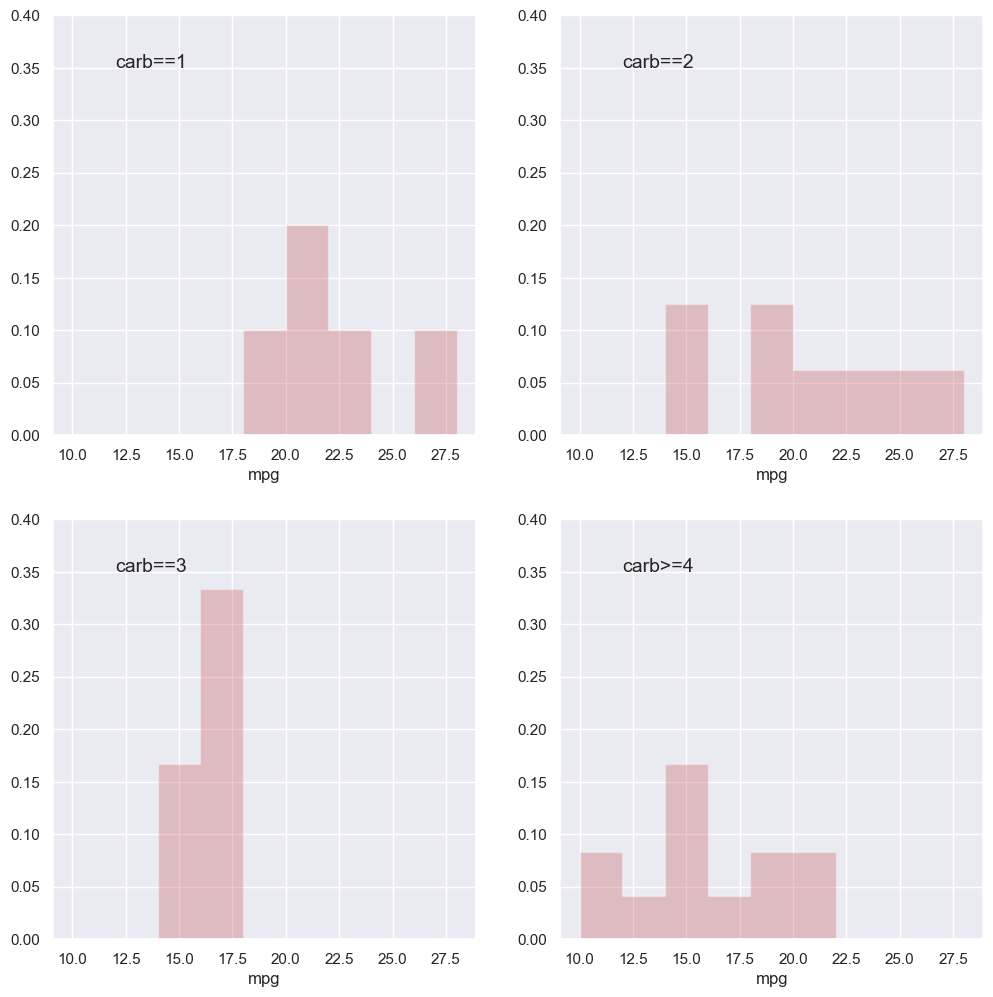

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
print(axes)
print(axes.ravel())
carbs = ['==1', '==2', '==3', '>=4']
bins = np.arange(10, 30, 2)
for ax, carb in zip(axes.ravel(), carbs):
    data = dfcars.query("carb%s" % carb)
    print(data.shape)
    #ax.plot(data.wt, data.mpg, 'o', markersize=10, alpha=0.5)
    ax.hist(data.mpg, bins=bins, histtype='stepfilled', normed=True, color='r', alpha=.3)    
    ax.annotate("carb"+str(carb), xy=(12, 0.35), fontsize=14)
    #ax.set_yticks([])
    ax.set_ylim((0,0.4))
    ax.set_xlabel('mpg');

## The Interest in Science Problem from lecture slides

Dataframe construction:

In [51]:
science = {
    'interest': ['Excited', 'Kind of interested', 'OK', 'Not great', 'Bored'],
    'before': [19, 25, 40, 5, 11],
    'after': [38, 30, 14, 6, 12]
}
dfscience = pd.DataFrame.from_dict(science).set_index("interest")[['before', 'after']]
dfscience

,before,after
interest,,
Excited,19,38
Kind of interested,25,30
OK,40,14
Not great,5,6
Bored,11,12


### Multiple Pie Charts

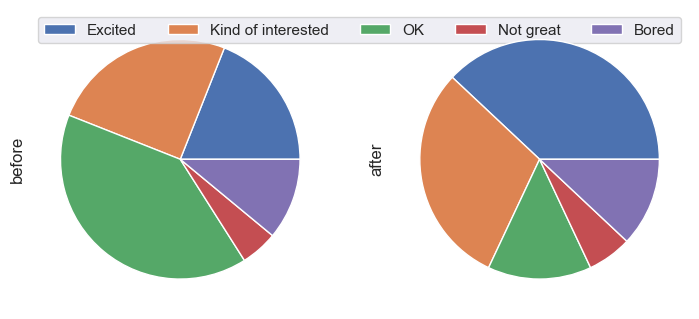

In [52]:
fig, axs = plt.subplots(1,2, figsize = (8.5,4))
dfscience.before.plot(kind="pie", ax=axs[0], labels=None);
axs[0].legend(loc="upper left", ncol=5, labels=dfscience.index)
dfscience.after.plot(kind="pie", ax=axs[1], labels=None);


### Before and after bar charts

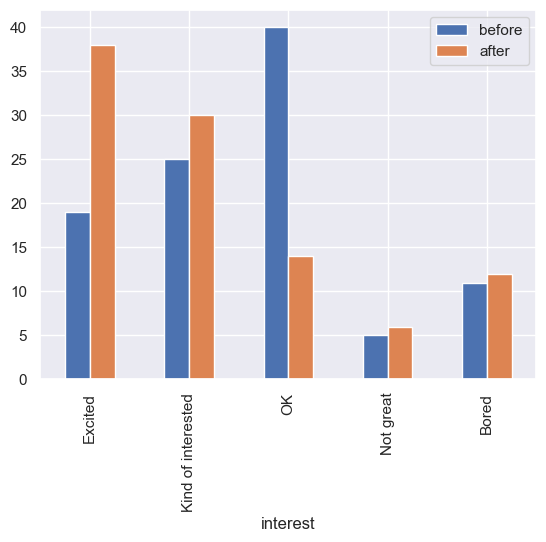

In [53]:
dfscience.plot(kind="bar");

### Stacked Charts


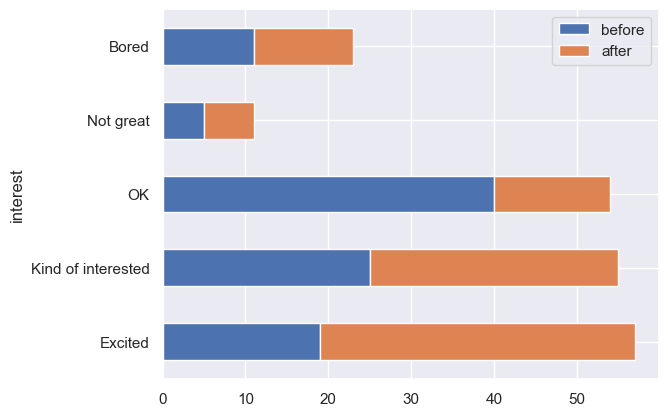

In [54]:
dfscience.plot(kind="barh", stacked=True);

This is hard to read. We wznt to compare before and after easily. Sometimes the solution is a transpose!!

In [55]:
dfscience.transpose()

interest,Excited,Kind of interested,OK,Not great,Bored
before,19,25,40,5,11
after,38,30,14,6,12


We have to play some games to get the ordering right...

In [56]:
dfst = dfscience.transpose()
dfst.iloc[[1, 0],:]

interest,Excited,Kind of interested,OK,Not great,Bored
after,38,30,14,6,12
before,19,25,40,5,11


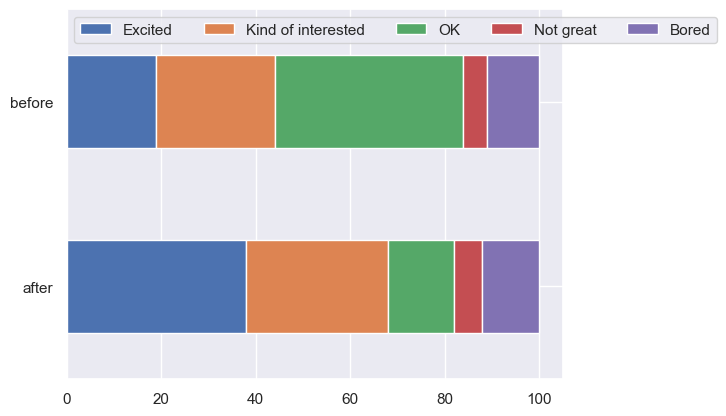

In [57]:
dfscience.transpose().loc[['after', 'before'], :].plot(kind="barh", stacked=True)
plt.legend(loc=2, ncol=5);

Now we see that the blue and greens have it. Try and improve this plot. It still has too much chartjunk.

### Difference Bar chart

Sometimes a small data transformation makes the effect blindingly obvious. Here we just make a bar chart of the change!

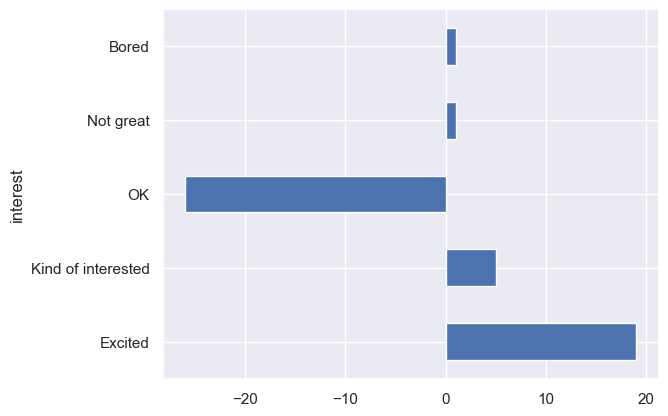

In [58]:
(dfscience.after - dfscience.before).plot(kind="barh");

## Bacteria Dataset

For those want to play...

In [59]:
antibiotics = [
  { "bacteria": "Mycobacterium tuberculosis", "penicillin": 800, "streptomycin": 5, "neomycin": 2, "gram": "negative" },
  { "bacteria": "Salmonella schottmuelleri", "penicillin": 10, "streptomycin": 0.8, "neomycin": 0.09, "gram": "negative" },
  { "bacteria": "Proteus vulgaris", "penicillin": 3, "streptomycin": 0.1, "neomycin": 0.1, "gram": "negative" },
  { "bacteria": "Klebsiella pneumoniae", "penicillin": 850, "streptomycin": 1.2, "neomycin": 1, "gram": "negative" },
  { "bacteria": "Brucella abortus", "penicillin": 1, "streptomycin": 2, "neomycin": 0.02, "gram": "negative" },
  { "bacteria": "Pseudomonas aeruginosa", "penicillin": 850, "streptomycin": 2, "neomycin": 0.4, "gram": "negative" },
  { "bacteria": "Escherichia coli", "penicillin": 100, "streptomycin": 0.4, "neomycin": 0.1, "gram": "negative" },
  { "bacteria": "Salmonella (Eberthella) typhosa", "penicillin": 1, "streptomycin": 0.4, "neomycin": 0.008, "gram": "negative" },
  { "bacteria": "Aerobacter aerogenes", "penicillin": 870, "streptomycin": 1, "neomycin": 1.6, "gram": "negative" },
  { "bacteria": "Brucella antracis", "penicillin": 0.001, "streptomycin": 0.01, "neomycin": 0.007, "gram": "positive" },
  { "bacteria": "Streptococcus fecalis", "penicillin": 1, "streptomycin": 1, "neomycin": 0.1, "gram": "positive" },
  { "bacteria": "Staphylococcus aureus", "penicillin": 0.03, "streptomycin": 0.03, "neomycin": 0.001, "gram": "positive" },
  { "bacteria": "Staphylococcus albus", "penicillin": 0.007, "streptomycin": 0.1, "neomycin": 0.001, "gram": "positive" },
  { "bacteria": "Streptococcus hemolyticus", "penicillin": 0.001, "streptomycin": 14, "neomycin": 10, "gram": "positive" },
  { "bacteria": "Streptococcus viridans", "penicillin": 0.005, "streptomycin": 10, "neomycin": 40, "gram": "positive" },
  { "bacteria": "Diplococcus pneumoniae", "penicillin": 0.005, "streptomycin": 11, "neomycin": 10, "gram": "positive" }
]
dfabio = pd.DataFrame.from_records(antibiotics)
dfabio

,bacteria,penicillin,streptomycin,neomycin,gram
0,Mycobacterium tuberculosis,800.000,5.00,2.000,negative
1,Salmonella schottmuelleri,10.000,0.80,0.090,negative
2,Proteus vulgaris,3.000,0.10,0.100,negative
3,Klebsiella pneumoniae,850.000,1.20,1.000,negative
4,Brucella abortus,1.000,2.00,0.020,negative
5,Pseudomonas aeruginosa,850.000,2.00,0.400,negative
6,Escherichia coli,100.000,0.40,0.100,negative
7,Salmonella (Eberthella) typhosa,1.000,0.40,0.008,negative
8,Aerobacter aerogenes,870.000,1.00,1.600,negative
9,Brucella antracis,0.001,0.01,0.007,positive
